# Create results and diagnostic plots

In [1]:
import numpy as np
import arviz as az
from pathlib import Path
from peak_performance import pipeline as pl, models, plots
from matplotlib import pyplot as plt

## Exemplary result with a single peak

In [7]:
path = Path("./paper raw data/exemplary results raw data/A1t1R1Part2_110_109.9_110.1.npy")
timeseries = np.load(path)

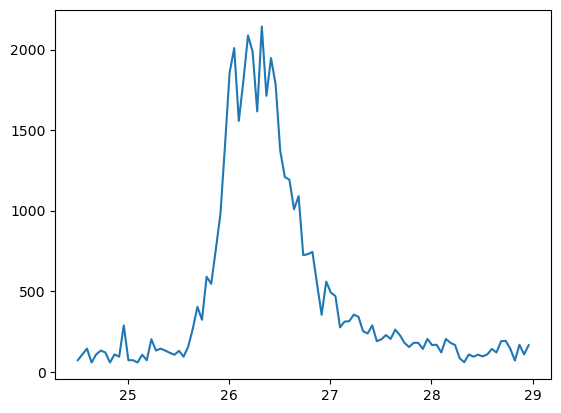

In [3]:
plt.plot(timeseries[0], timeseries[1])

In [4]:
pmodel = models.define_model_skew(
    time=timeseries[0],
    intensity=timeseries[1]
)
idata = pl.sampling(pmodel, tune=6000, draws=2000)
idata = pl.posterior_predictive_sampling(pmodel, idata)
summary = az.summary(idata, var_names=["~y", "~baseline", "offset"])
summary

c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\pymc\data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [L, alpha, area, baseline_intercept, baseline_slope, mean, noise, std]


Progress,Draws,Divergences,Step Size,Gradients/Draw
,8000,0,0.62,11
,8000,0,0.62,3
,8000,0,0.64,15
,8000,0,0.63,15


Sampling: [L]


Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
baseline_intercept,-43.905,7.482,-58.489,-30.313,0.083,0.059,8177.0,5627.0,1.0
baseline_slope,6.652,0.515,5.686,7.634,0.007,0.005,5546.0,5473.0,1.0
noise_log__,4.640,0.075,4.496,4.777,0.001,0.001,8434.0,5457.0,1.0
mean,25.948,0.013,25.925,25.973,0.000,0.000,2865.0,3508.0,1.0
std_log__,-0.643,0.041,-0.720,-0.565,0.001,0.001,2483.0,3457.0,1.0
alpha,2.965,0.395,2.205,3.684,0.007,0.005,2952.0,4145.0,1.0
area_log__,7.321,0.025,7.275,7.368,0.000,0.000,4780.0,5078.0,1.0
noise,103.796,7.883,89.652,118.667,0.087,0.062,8434.0,5457.0,1.0
std,0.526,0.022,0.486,0.568,0.000,0.000,2483.0,3457.0,1.0
area,1512.300,37.144,1443.729,1584.080,0.537,0.380,4780.0,5078.0,1.0


C:\Users\joche\AppData\Local\Temp\ipykernel_10648\1943866237.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


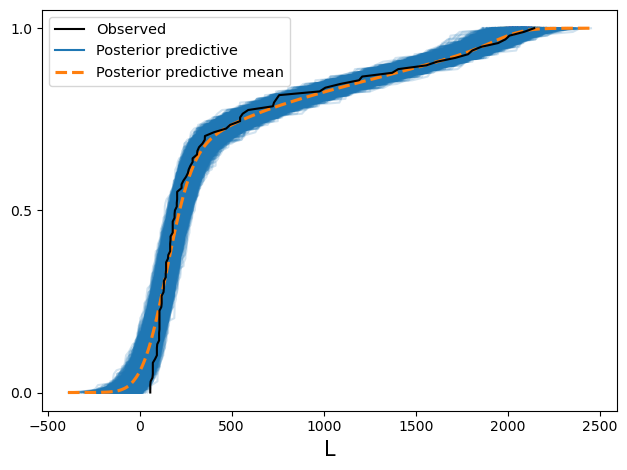

In [5]:
axs = az.plot_ppc(
    idata,
    # data_pairs={"L":"L"},
    var_names=["L"],
    kind="cumulative",
    # backend_kwargs=dict(sharey=True),
)
fig = plt.gcf()
plt.tight_layout()

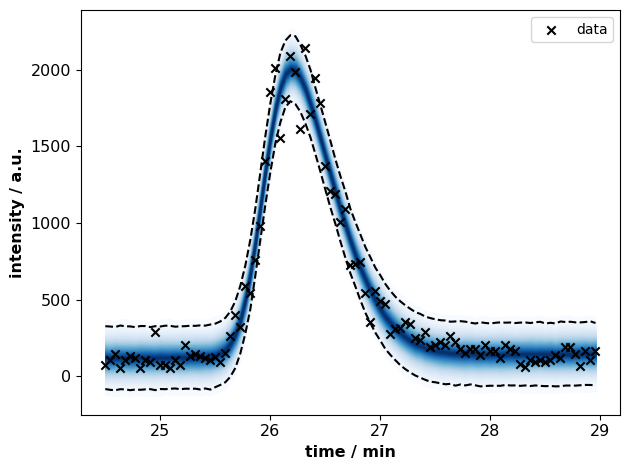

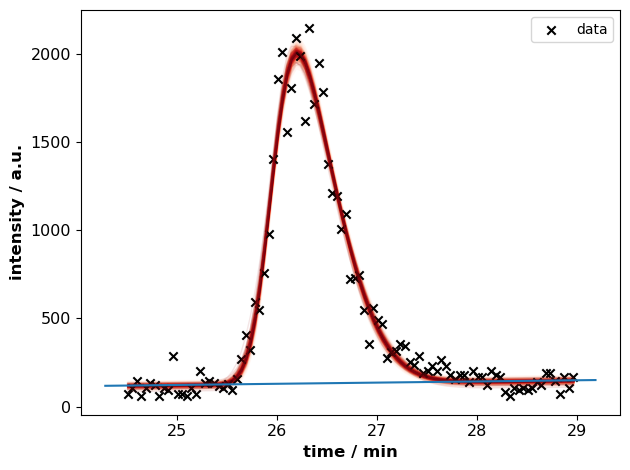

In [6]:
plots.plot_posterior_predictive(
    identifier="peak_fit_skew_normal",
    time=timeseries[0],
    intensity=timeseries[1],
    path=None,
    idata=idata,
    discarded=False,
)

plots.plot_posterior(
    identifier="peak_fit_skew_normal",
    time=timeseries[0],
    intensity=timeseries[1],
    path=None,
    idata=idata,
    discarded=False,
)

## Exemplary result with a double peak

In [8]:
path_d = Path("./paper raw data/exemplary results raw data/A2t2R1Part1_132_85.9_86.1.npy")
timeseries_d = np.load(path_d)

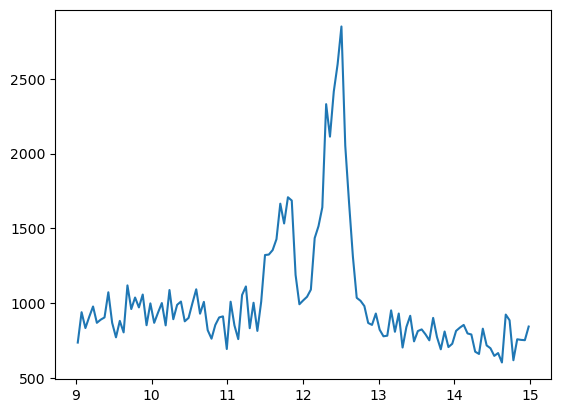

In [9]:
plt.plot(timeseries_d[0], timeseries_d[1])

In [10]:
pmodel_d = models.define_model_double_normal(
    time=timeseries_d[0],
    intensity=timeseries_d[1]
)
idata_d = pl.sampling(pmodel_d, tune=12000, draws=2000)
idata_d = pl.posterior_predictive_sampling(pmodel_d, idata_d)
summary_d = az.summary(idata_d, var_names=["~y", "~baseline", "offset"])
summary_d

c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\pymc\data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [L, baseline_intercept, baseline_slope, height, meanmean, noise, separation, std]


Progress,Draws,Divergences,Step Size,Gradients/Draw
,14000,0,0.54,19
,14000,0,0.50,15
,14000,0,0.52,7
,14000,0,0.52,7


Sampling: [L]


Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
baseline_intercept,1115.666,38.657,1043.432,1189.528,0.744,0.527,2698.0,3428.0,1.0
baseline_slope,-21.696,3.074,-27.317,-15.830,0.059,0.042,2760.0,3457.0,1.0
noise_log__,4.774,0.067,4.647,4.895,0.001,0.000,9435.0,5419.0,1.0
std_log__[0],-1.814,0.109,-2.012,-1.600,0.001,0.001,6549.0,5310.0,1.0
std_log__[1],-1.879,0.044,-1.962,-1.799,0.001,0.000,7003.0,5881.0,1.0
height_log__[0],6.652,0.084,6.488,6.802,0.001,0.001,6799.0,5939.0,1.0
height_log__[1],7.474,0.037,7.402,7.540,0.000,0.000,7579.0,6571.0,1.0
meanmean,12.082,0.008,12.066,12.097,0.000,0.000,6578.0,5824.0,1.0
separation_log__,-0.354,0.023,-0.397,-0.312,0.000,0.000,6552.0,6261.0,1.0
noise,118.630,7.977,104.241,133.608,0.083,0.059,9435.0,5419.0,1.0


C:\Users\joche\AppData\Local\Temp\ipykernel_10648\1105783876.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


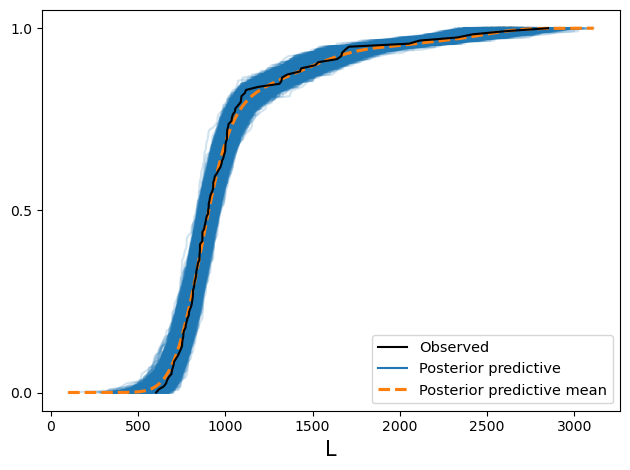

In [11]:
axs = az.plot_ppc(
    idata_d,
    # data_pairs={"L":"L"},
    var_names=["L"],
    kind="cumulative",
    # backend_kwargs=dict(sharey=True),
)
fig = plt.gcf()
plt.tight_layout()

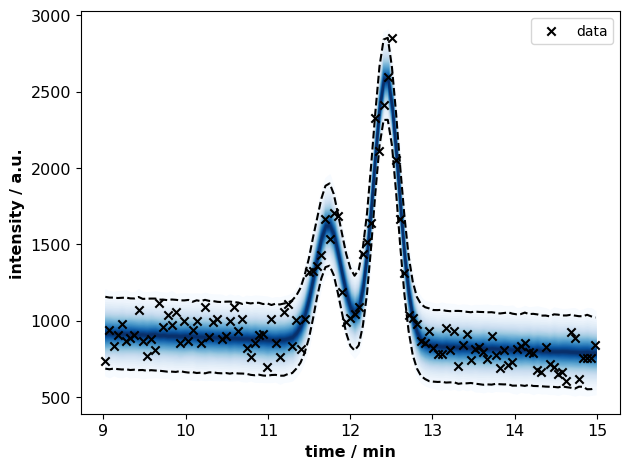

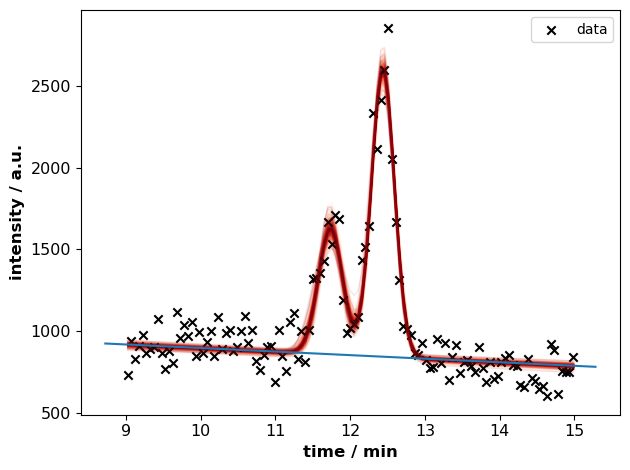

In [12]:
plots.plot_posterior_predictive(
    identifier="peak_fit_double_normal",
    time=timeseries_d[0],
    intensity=timeseries_d[1],
    path=None,
    idata=idata_d,
    discarded=False,
)

plots.plot_posterior(
    identifier="peak_fit_double_normal",
    time=timeseries_d[0],
    intensity=timeseries_d[1],
    path=None,
    idata=idata_d,
    discarded=False,
)

In [13]:
%load_ext watermark
%watermark -idu

Last updated: 2024-10-25T00:29:06.483027+01:00

